# Análise - Salários de trabalho em Data Science 

## Sobre o dataset

Esse é um dataset com dados que foram montados pelo ai-jobs.net. É um site que coleta informações(anônimas) de salários de profissionais por todo o mundo na área de Inteligência Artificial, Machine Learning e Big Data.

Esses dados foram retirados do site em 29 de agosto de 2022. As 11 colunas estão descritas a seguir.

* **work_year**: Ano que o salário foi pago
* **experience_level**: Nível de experiência durante o ano
    - EN: Entry-level / Junior
    - MI: Mid-level / Intermediate
    - SE: Senior-level / Expert
    - EX: Executive-level / Director
* **employment_type**: Tipo de emprego
    - PT: Part-time
    - FT: Full-time
    - CT: Contract
    - FL: Freelance    
* **job_title**: Nome da vaga
* **salary**: Salário bruto pago
* **salary_currency**: Moeda do salário pago
* **salary_in_usd**: Salário em dólar (taxa de câmbio média do ano)
* **employee_residence**: Principal país de residência durante o ano de trabalho
* **remote_ratio**: Se o trabalho foi feito remotamente
    - 0: Nenhum trabalho remoto (menos que 20%)
    - 50: Parcialmente remoto
    - 100: Totalmente remoto (mais que 80%)
* **company_location**: País da empresa matriz
* **company_size**: Média de pessoas que trabalham para a empresa
    - S: Menos de 50 funcionários (pequena)
    - M: Entre 50 e 250 funcionários (média)
    - L: Mais que 250 funcionários (grande)

## Análise dos dados

Importando as bibliotecas que serão utilizadas para a análise dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_salary = pd.read_csv('salaries.csv')

In [3]:
df_salary.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,BI Data Analyst,77000,AUD,54840,AU,100,AU,M
1,2022,SE,FT,Data Scientist,175000,USD,175000,US,0,US,M
2,2022,SE,FT,Data Scientist,140000,USD,140000,US,0,US,M
3,2022,EN,FT,3D Computer Vision Researcher,2324,USD,2324,AX,0,AL,L
4,2022,SE,FT,Lead Data Scientist,28500,EUR,30615,PT,50,PT,S


In [4]:
print('Tamanho do dataset:', df_salary.shape)

Tamanho do dataset: (827, 11)


In [5]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           827 non-null    int64 
 1   experience_level    827 non-null    object
 2   employment_type     827 non-null    object
 3   job_title           827 non-null    object
 4   salary              827 non-null    int64 
 5   salary_currency     827 non-null    object
 6   salary_in_usd       827 non-null    int64 
 7   employee_residence  827 non-null    object
 8   remote_ratio        827 non-null    int64 
 9   company_location    827 non-null    object
 10  company_size        827 non-null    object
dtypes: int64(4), object(7)
memory usage: 71.2+ KB


Temos um dataset com 827 linhas/coletas e 11 colunas/atributos. Nenhuma coluna tem dados nulos. As colunas de work_salary, salary, salary_in_usd e remote_ratio estão como valores inteiros, como era de se esperar.

In [6]:
df_salary['work_year'].value_counts()

2022    533
2021    219
2020     75
Name: work_year, dtype: int64

Temos dados desde 2020, sendo 2022 o ano em que se obtiveram mais coletas. Dados recentes, dando uma visão melhor para profissionais da área de dados ou quem busca uma transição de carreira voltada para dados, que queiram saber como está o mercado.

#### Nível de experiência

Text(0.5, 1.0, 'Nível de Experiência')

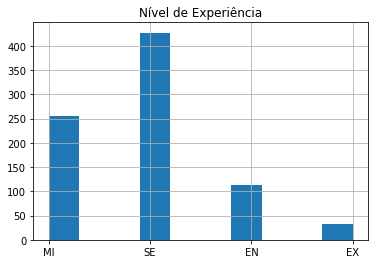

In [7]:
df_salary['experience_level'].hist()
plt.title('Nível de Experiência')

Temos que mais da metade dos dados (51%) são de cargos sênior/expert e a minoria são de cargos executivos/diretor.

In [8]:
df_exp = df_salary.groupby(['experience_level'])

In [9]:
df_exp.salary_in_usd.mean().sort_values(ascending=False)

experience_level
EX    214152.156250
SE    144117.011710
MI     90184.843137
EN     61776.814159
Name: salary_in_usd, dtype: float64

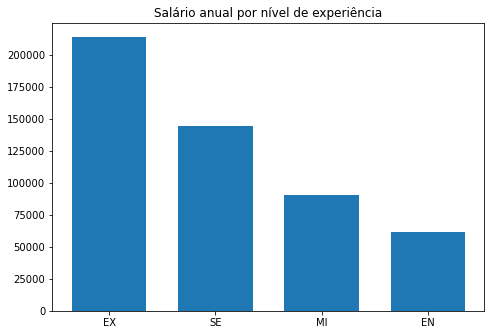

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
exp = ['EX', 'SE', 'MI', 'EN']
salary_exp = df_exp.salary_in_usd.mean().sort_values(ascending=False)
ax.bar(exp,salary_exp,width=0.7)
plt.title('Salário anual por nível de experiência')
plt.show()

Como era de se esperar, os salários mais altos são para cargos executivos e os mais baixos para júnior

#### Tipo de emprego

Text(0.5, 1.0, 'Tipo de emprego')

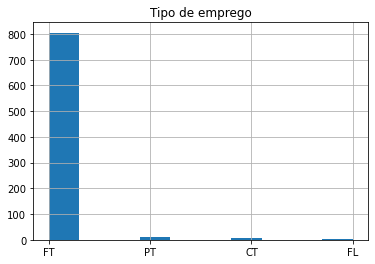

In [11]:
df_salary['employment_type'].hist()
plt.title('Tipo de emprego')

Quase todos os cargos são para trabalho integral (full time)

In [12]:
df_type = df_salary.groupby(['employment_type'])

In [13]:
salary_types = df_type.salary_in_usd.mean().sort_values(ascending=False)
salary_types

employment_type
CT    303692.166667
FT    119110.515528
FL     44634.000000
PT     39950.909091
Name: salary_in_usd, dtype: float64

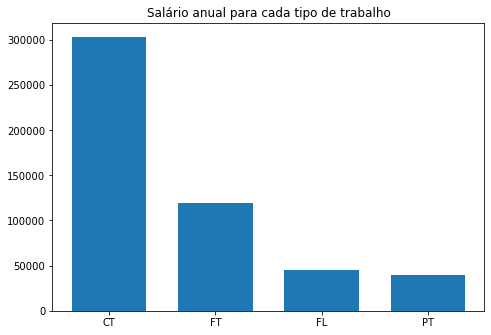

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
types = ['CT', 'FT', 'FL', 'PT']
ax.bar(types,salary_types,width=0.7)
plt.title('Salário anual para cada tipo de trabalho')
plt.show()

Os cargos tipo 'Contractor' são os que pagam melhores salários. Mas não podemos tirar muitas conclusões porque a quantidade de pessoas com esse tipo de emprego é muito pequena.

Qual a diferença entre 'Contractor' e 'Full-time'?
'Contractor' é um trabalho que o contrato é feito para um tipo de serviço (geralmente), ele é pago por hora, não tem direito à férias, bônus e direitos de treinamento, cursos. Já o tipo 'Full-time' é pago anualmente, tem direito à bônus, férias, é um emprego mais estável.

#### Descrição do cargo

In [15]:
df_salary['job_title'].value_counts().head()

Data Engineer                189
Data Scientist               183
Data Analyst                 126
Machine Learning Engineer     66
Data Science Manager          25
Name: job_title, dtype: int64

Os 5 cargos que apareceram mais vezes no dataset foram os descritos acima. Uma atenção especial deve ser dada para os top 3 dessa lista.

Salário médio dos top 3 cargos (usd):

In [16]:
print('Salário médio anual para top 3 cargos')
# Média de salário para Data Engineer  
print('\nData Engineer:')
print(df_salary[df_salary['job_title'] == 'Data Engineer']['salary_in_usd'].mean())
# Média de salário para Data Scientist
print('\nData Scientist:')
print(df_salary[df_salary['job_title'] == 'Data Scientist']['salary_in_usd'].mean())
# Média de salário para Data Analyst 
print('\nData Analyst:')
print(df_salary[df_salary['job_title'] == 'Data Analyst']['salary_in_usd'].mean())

Salário médio anual para top 3 cargos

Data Engineer:
116866.92592592593

Data Scientist:
112261.39344262295

Data Analyst:
95782.76984126984


#### Salário em Dólar

In [17]:
df_salary['salary_in_usd'].describe()

count       827.000000
mean     118946.490931
std       78283.334993
min        2324.000000
25%       65006.500000
50%      110000.000000
75%      156800.000000
max      900000.000000
Name: salary_in_usd, dtype: float64

<AxesSubplot:>

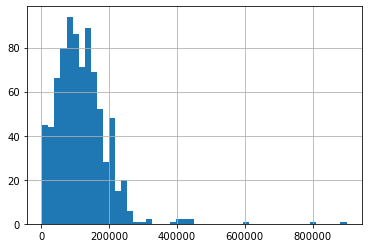

In [18]:
df_salary['salary_in_usd'].hist(bins=50)

Média salarial do dataset é de ~ 119 mil dólares por ano, próximo à média salarial de um engenheiro de dados. O salário mais alto foi de 900 mil dólares, bem alto com relação à média. 75% dos salários ficam em até 156800.

#### Países de residência dos empregados

In [19]:
print('Número de países com dados:')
print(len(df_salary['employee_residence'].value_counts()))

Número de países com dados:
63


In [20]:
df_salary['employee_residence'].value_counts().head()

US    496
GB     60
IN     38
CA     31
DE     28
Name: employee_residence, dtype: int64

Na maioria dos cargos os funcionários estavam morando nos Estados Unidos.

In [21]:
df_salary[df_salary['employee_residence'] == 'BR']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
36,2022,EN,FT,BI Data Analyst,32400,BRL,6322,BR,100,BR,L
96,2022,SE,FT,Data Scientist,12500,BRL,2439,BR,100,BR,L
517,2022,SE,FT,Data Scientist,100000,USD,100000,BR,100,US,M
550,2021,SE,FT,Computer Vision Engineer,24000,USD,24000,BR,100,BR,M
651,2021,SE,FT,Cloud Data Engineer,160000,USD,160000,BR,100,US,S
774,2021,MI,FT,Data Scientist,69600,BRL,12901,BR,0,BR,S
794,2021,SE,FT,Computer Vision Engineer,102000,BRL,18907,BR,0,BR,M
807,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S


Temos apenas 8 dados de funcionários que moram no Brasil. Sendo que 3 (37%) deles trabalham para uma empresa nos Estados Unidos. E apenas 2 (25%) funcionários trabalham presencial.

#### Taxa de Trabalho Remoto

In [22]:
df_salary['remote_ratio'].value_counts()

100    490
0      222
50     115
Name: remote_ratio, dtype: int64

A grande maioria dos dados (59%) são de trabalhos totalmente remotos, seguidos dos presenciais (27%). Os trabalhores em modo híbrido são cerca de 14% apenas.

In [23]:
remote_salary = df_salary.groupby(['remote_ratio'])
remote_salary = remote_salary.salary_in_usd.mean()
remote_salary

remote_ratio
0      124892.067568
50      82628.565217
100    124776.375510
Name: salary_in_usd, dtype: float64

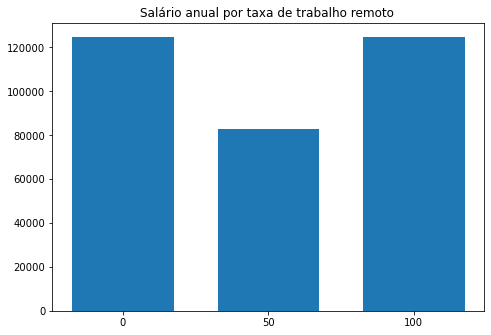

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
types = ['0', '50', '100']
ax.bar(types,remote_salary,width=0.7)
plt.title('Salário anual por taxa de trabalho remoto ')
plt.show()

In [25]:
df_2022 = df_salary[df_salary['work_year']==2022]
df_2021 = df_salary[df_salary['work_year']==2021]
df_2020 = df_salary[df_salary['work_year']==2020]

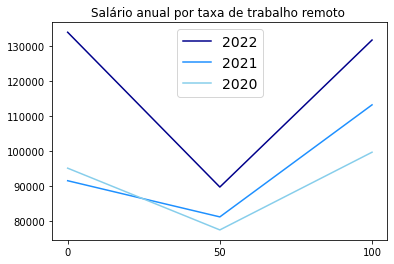

In [26]:
remote_2022 = df_2022.groupby(['remote_ratio'])
remote_2022 = remote_2022.salary_in_usd.mean()

remote_2021 = df_2021.groupby(['remote_ratio'])
remote_2021 = remote_2021.salary_in_usd.mean()

remote_2020 = df_2020.groupby(['remote_ratio'])
remote_2020 = remote_2020.salary_in_usd.mean()

width=0.4
fig,ax = plt.subplots()
types = ['0', '50', '100']
ax.plot(types,remote_2022,color='darkblue')
ax.plot(types,remote_2021,color='dodgerblue')
ax.plot(types,remote_2020,color='skyblue')

plt.legend(['2022','2021','2020'], fontsize=14)
plt.title('Salário anual por taxa de trabalho remoto ')
plt.show()

Em 2020 e 2021 os trabalhos 100% remotos(100) pagavam mais que os feitos presencial(0), já em 2022 esse cenário mudou e houve um balanceamento dos salários para quem trabalha remoto e presencial. Além disso, podemos observar que os trabalhos feito em modo híbrido(50) pagam uma quantia menor que os outros modos em todos os anos.

Salários para quem trabalha totalmente remoto ou totalmente presencial estão praticamente iguais.

#### Tamanho da Empresa

Text(0.5, 1.0, 'Tamanho da empresa')

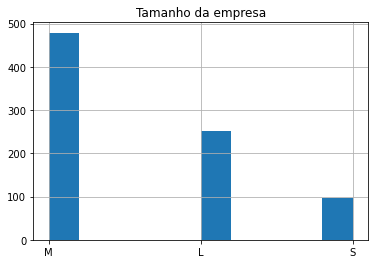

In [27]:
df_salary['company_size'].hist()
plt.title('Tamanho da empresa')

In [28]:
print(df_salary['company_size'].value_counts()/len(df_salary))

M    0.579202
L    0.304716
S    0.116082
Name: company_size, dtype: float64


58% dos dados vem de empresas que são de médio porte.

In [29]:
size_salary = df_salary.groupby(['company_size'])
size_salary = size_salary.salary_in_usd.mean()
size_salary

company_size
L    122031.309524
M    126496.037578
S     73179.750000
Name: salary_in_usd, dtype: float64

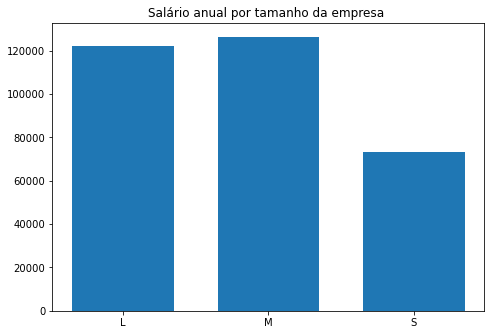

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
types = ['L', 'M', 'S']
ax.bar(types,size_salary,width=0.7)
plt.title('Salário anual por tamanho da empresa ')
plt.show()

Empresas de médio e grande porte pagam salários similares.

## Conclusão

A partir da análise dos dados podemos perceber que a área de dados vem crescendo, tanto em relação a quantidade de vagas que surgem (tomando por base a quantidade de dados obtidos em cada ano), quanto em salário. 

A maioria dos cargos são para full-time, bom para quem prefere ter um emprego com mais estabilidade e benefícios. Apesar do salário ser menor que para quem é 'contractor', ele está em uma faixa que faz sentido quando se analise todos os tipos de trabalho.

Em relação aos top 3 títulos de trabalho estão: Data Engineer, Data Scientist e Data Analyst. Para quem está pretendendo uma mudança de carreira, pode ser bom começar por uma dessas, pelos dados tende a ser as que mais oferecem oportunidades.

A maioria dos cargos estão nos Estados Unidos, pode ser porque é onde ficam as maiores empresas de tecnologia (precisariamos de mais dados sobre as empresas). 

Nos anos de 2020 e 2021 os trabalhos eram majoritariamente remotos, porém esse cenário vem mudando (grande relação com a pandemia do COVID-19).